# Import data

In [1]:
# import pandas as pd
# import numpy as np
# df = pd.read_csv('df_advdlproject.csv')
# df_train = pd.read_csv('train_advdlproject.csv')
# df_val = pd.read_csv('val_advdlproject.csv')
# df_test = pd.read_csv('test_advdlproject.csv')

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('df_revised_advdlproject.csv')
df_train = pd.read_csv('train_revised_advdlproject.csv')
df_val = pd.read_csv('val_revised_advdlproject.csv')
df_test = pd.read_csv('test_revised_advdlproject.csv')

In [2]:
# convert into data
df_train_data = df.loc[df['imdb_id'].isin(df_train['imdb_id'])]
df_test_data = df.loc[df['imdb_id'].isin(df_test['imdb_id'])]
df_val_data = df.loc[df['imdb_id'].isin(df_val['imdb_id'])]

In [3]:
df_train_data = df_train_data.reset_index()
df_val_data = df_val_data.reset_index()
df_test_data = df_test_data.reset_index()

In [4]:
df.columns

Index(['imdb_id', 'runtimeMinutes', 'genres', 'cast', 'averageRating',
       'numVotes', 'title', 'original_title', 'overview', 'release_date',
       'revenue_worldwide_BOM', 'director', 'countries', 'country codes',
       'language codes', 'languages', 'Budget', 'cover url',
       'production companies'],
      dtype='object')

## Convert categorical data into label encoded multiple columns

#### Budget

In [5]:

# train , test, val

df_genres_train = df_train_data['genres'].str.split('|', expand=True)
df_genres_val = df_val_data['genres'].str.split('|', expand=True)
df_genres_test = df_test_data['genres'].str.split('|', expand=True)

# rename columns
df_genres_train = df_genres_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_val = df_genres_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_test = df_genres_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
genres_train = np.concatenate((np.concatenate((df_genres_train.g1.unique(), df_genres_train.g2.unique()),axis = 0)
                         , df_genres_train.g3.unique()),axis = 0)
genres_val = np.concatenate((np.concatenate((df_genres_val.g1.unique(), df_genres_val.g2.unique()),axis = 0)
                         , df_genres_val.g3.unique()),axis = 0)

set_genres_train = set(genres_train)
set_genres_val= set(genres_val)
set_genres_train_val = set_genres_train.union(set_genres_val)

list_genres = list(set_genres_train_val)

df_genres_modified_train = pd.DataFrame(np.zeros(shape=(len(df_genres_train),len(df_genres_train.columns))))
df_genres_modified_val = pd.DataFrame(np.zeros(shape=(len(df_genres_val),len(df_genres_val.columns))))
df_genres_modified_test = pd.DataFrame(np.zeros(shape=(len(df_genres_test),len(df_genres_test.columns))))

k = 0
for index, row in df_genres_train.iterrows():
    df_genres_modified_train.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_train.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_train.at[k,2] = list_genres.index(row['g3'])
    k = k+1

k = 0
for index,row in df_genres_val.iterrows():
    df_genres_modified_val.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_val.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_val.at[k,2] = list_genres.index(row['g3'])
    k = k+1
    
k = 0
for index,row in df_genres_test.iterrows():
    df_genres_modified_test.at[k,0] = list_genres.index(row['g1'])
    df_genres_modified_test.at[k,1] = list_genres.index(row['g2'])
    df_genres_modified_test.at[k,2] = list_genres.index(row['g3'])
    k = k+1

df_genres_modified_train = df_genres_modified_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_modified_val = df_genres_modified_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_genres_modified_test = df_genres_modified_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

#### Director

In [6]:
# train , test, val

df_director_train = df_train_data['director'].str.split('|', expand=True)
df_director_val = df_val_data['director'].str.split('|', expand=True)
df_director_test = df_test_data['director'].str.split('|', expand=True)

# rename columns
df_director_train = df_director_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_director_val = df_director_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_director_test = df_director_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})

# conacatenate uniques from all columns because we want to count unique entries
director_train = np.concatenate((np.concatenate((np.concatenate((df_director_train.g1.unique(),
                                                 df_director_train.g2.unique()),axis = 0)
                         , df_director_train.g3.unique()),axis = 0), df_director_train.g4.unique()),axis = 0)
director_val = np.concatenate((np.concatenate((np.concatenate((df_director_val.g1.unique(),
                                                               df_director_val.g2.unique()),axis = 0)
                         , df_director_val.g3.unique()),axis = 0), df_director_val.g4.unique()),axis = 0)

set_director_train = set(director_train)
set_director_val= set(director_val)
set_director_train_val = set_director_train.union(set_director_val)

list_director = list(set_director_train_val)

df_director_modified_train = pd.DataFrame(np.zeros(shape=(len(df_director_train),len(df_director_train.columns))))
df_director_modified_val = pd.DataFrame(np.zeros(shape=(len(df_director_val),len(df_director_val.columns))))
df_director_modified_test = pd.DataFrame(np.zeros(shape=(len(df_director_test),len(df_director_test.columns))))


k = 0
for index, row in df_director_train.iterrows():
    cindex = 0
    for c in df_director_train.columns:
        df_director_modified_train.at[k,cindex] = list_director.index(row[c])
    k = k+1

k = 0
for index,row in df_director_val.iterrows():
    cindex = 0
    for c in df_director_val.columns:
        df_director_modified_val.at[k,cindex] = list_director.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_director)
for index,row in df_director_test.iterrows():
    cindex = 0
    for c in df_director_test.columns:
        df_director_modified_test.at[k,cindex] = list_director.index(row[c]) if row[c] in list_director else missing_index
    k = k+1


df_director_modified_train = df_director_modified_train.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})
df_director_modified_val = df_director_modified_val.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})
df_director_modified_test = df_director_modified_test.rename(columns={0: 'd1', 1: 'd2', 2: 'd3', 3: 'd4'})

#### Production Company

In [7]:
# train , test, val

df_pc_train = df_train_data['production companies'].str.split('|', expand=True)
df_pc_val = df_val_data['production companies'].str.split('|', expand=True)
df_pc_test = df_test_data['production companies'].str.split('|', expand=True)

# reanem columns
df_pc_train = df_pc_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_pc_val = df_pc_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})
df_pc_test = df_pc_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3', 3: 'g4'})

# conacatenate uniques from all columns because we want to count unique entries
pc_train = np.concatenate((np.concatenate((np.concatenate((df_pc_train.g1.unique(),
                                                 df_pc_train.g2.unique()),axis = 0)
                         , df_pc_train.g3.unique()),axis = 0), df_pc_train.g4.unique()),axis = 0)
pc_val = np.concatenate((np.concatenate((np.concatenate((df_pc_val.g1.unique(),
                                                               df_pc_val.g2.unique()),axis = 0)
                         , df_pc_val.g3.unique()),axis = 0), df_pc_val.g4.unique()),axis = 0)

set_pc_train = set(pc_train)
set_pc_val= set(pc_val)
set_pc_train_val = set_pc_train.union(set_pc_val)

list_pc = list(set_pc_train_val)

df_pc_modified_train = pd.DataFrame(np.zeros(shape=(len(df_pc_train),len(df_pc_train.columns))))
df_pc_modified_val = pd.DataFrame(np.zeros(shape=(len(df_pc_val),len(df_pc_val.columns))))
df_pc_modified_test = pd.DataFrame(np.zeros(shape=(len(df_pc_test),len(df_pc_test.columns))))


k = 0
for index, row in df_pc_train.iterrows():
    cindex = 0
    for c in df_pc_train.columns:
        df_pc_modified_train.at[k,cindex] = list_pc.index(row[c])
    k = k+1

k = 0
for index,row in df_pc_val.iterrows():
    cindex = 0
    for c in df_pc_val.columns:
        df_pc_modified_val.at[k,cindex] = list_pc.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_pc)
for index,row in df_pc_test.iterrows():
    cindex = 0
    for c in df_pc_test.columns:
        df_pc_modified_test.at[k,cindex] = list_pc.index(row[c]) if row[c] in list_pc else missing_index
    k = k+1

df_pc_modified_train = df_pc_modified_train.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})
df_pc_modified_val = df_pc_modified_val.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})
df_pc_modified_test = df_pc_modified_test.rename(columns={0: 'pc1', 1: 'pc2', 2: 'pc3', 3: 'pc4'})

#### Cast

In [8]:
# train , test, val

df_cast_train = df_train_data['cast'].str.split('|', expand=True)
df_cast_val = df_val_data['cast'].str.split('|', expand=True)
df_cast_test = df_test_data['cast'].str.split('|', expand=True)

# reanem columns
df_cast_train = df_cast_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_cast_val = df_cast_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_cast_test = df_cast_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
cast_train = np.concatenate((np.concatenate((df_cast_train.g1.unique(),
                                                 df_cast_train.g2.unique()),axis = 0)
                         , df_cast_train.g3.unique()),axis = 0)
cast_val = np.concatenate((np.concatenate((df_cast_val.g1.unique(),
                                                               df_cast_val.g2.unique()),axis = 0)
                         , df_cast_val.g3.unique()),axis = 0)

set_cast_train = set(cast_train)
set_cast_val= set(cast_val)
set_cast_train_val = set_cast_train.union(set_cast_val)

list_cast = list(set_cast_train_val)

df_cast_modified_train = pd.DataFrame(np.zeros(shape=(len(df_cast_train),len(df_cast_train.columns))))
df_cast_modified_val = pd.DataFrame(np.zeros(shape=(len(df_cast_val),len(df_cast_val.columns))))
df_cast_modified_test = pd.DataFrame(np.zeros(shape=(len(df_cast_test),len(df_cast_test.columns))))

k = 0
for index, row in df_cast_train.iterrows():
    cindex = 0
    for c in df_cast_train.columns:
        df_cast_modified_train.at[k,cindex] = list_cast.index(row[c])
    k = k+1

k = 0
for index,row in df_cast_val.iterrows():
    cindex = 0
    for c in df_cast_val.columns:
        df_cast_modified_val.at[k,cindex] = list_cast.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_cast)
for index,row in df_cast_test.iterrows():
    cindex = 0
    for c in df_cast_test.columns:
        df_cast_modified_test.at[k,cindex] = list_cast.index(row[c]) if row[c] in list_cast else missing_index
    k = k+1

df_cast_modified_train = df_cast_modified_train.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})
df_cast_modified_val = df_cast_modified_val.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})
df_cast_modified_test = df_cast_modified_test.rename(columns={0: 'c1', 1: 'c2', 2: 'c3'})

#### Lang

In [9]:
# train , test, val

df_lang_train = df_train_data['cast'].str.split('|', expand=True)
df_lang_val = df_val_data['cast'].str.split('|', expand=True)
df_lang_test = df_test_data['cast'].str.split('|', expand=True)

# reanem columns
df_lang_train = df_lang_train.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_lang_val = df_lang_val.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})
df_lang_test = df_lang_test.rename(columns={0: 'g1', 1: 'g2', 2: 'g3'})

# conacatenate uniques from all columns because we want to count unique entries
lang_train = np.concatenate((np.concatenate((df_lang_train.g1.unique(),
                                                 df_lang_train.g2.unique()),axis = 0)
                         , df_lang_train.g3.unique()),axis = 0)
lang_val = np.concatenate((np.concatenate((df_lang_val.g1.unique(),
                                                               df_lang_val.g2.unique()),axis = 0)
                         , df_lang_val.g3.unique()),axis = 0)

set_lang_train = set(lang_train)
set_lang_val= set(lang_val)
set_lang_train_val = set_lang_train.union(set_lang_val)

list_lang = list(set_lang_train_val)

df_lang_modified_train = pd.DataFrame(np.zeros(shape=(len(df_lang_train),len(df_lang_train.columns))))
df_lang_modified_val = pd.DataFrame(np.zeros(shape=(len(df_lang_val),len(df_lang_val.columns))))
df_lang_modified_test = pd.DataFrame(np.zeros(shape=(len(df_lang_test),len(df_lang_test.columns))))

k = 0
for index, row in df_lang_train.iterrows():
    cindex = 0
    for c in df_lang_train.columns:
        df_lang_modified_train.at[k,cindex] = list_lang.index(row[c])
    k = k+1

k = 0
for index,row in df_lang_val.iterrows():
    cindex = 0
    for c in df_lang_val.columns:
        df_lang_modified_val.at[k,cindex] = list_lang.index(row[c])
    k = k+1
    
k = 0
missing_index = len(list_lang)
for index,row in df_lang_test.iterrows():
    cindex = 0
    for c in df_lang_test.columns:
        df_lang_modified_test.at[k,cindex] = list_lang.index(row[c]) if row[c] in list_lang else missing_index
    k = k+1

df_lang_modified_train = df_lang_modified_train.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})
df_lang_modified_val = df_lang_modified_val.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})
df_lang_modified_test = df_lang_modified_test.rename(columns={0: 'l1', 1: 'l2', 2: 'l3'})

## Random Forest

#### 
set parameters :  n_jobs = -1, criterion = squared_error <br/>
Hyperparameters to be tuned - <br/>
min_sample_leaf,max_features, n_estimators, max_depth <br/>

In [54]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=ec4629e2e7101aaa5c19fdb527db599b7c062d60d952fbcda2c4f6d6c70859bb
  Stored in directory: /Users/shikhaasrani/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [10]:
from sklearn.ensemble import RandomForestRegressor

## Getting data ready for training, validation and testing

In [12]:
df_train_data = df_train_data.reset_index()
df_val_data = df_val_data.reset_index()
df_test_data = df_test_data.reset_index()

ValueError: cannot insert level_0, already exists

In [14]:
df_train_runMin = df_train_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_train_budget = df_train_data['Budget'].replace(np.nan, 0)
df_val_runMin = df_val_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_val_budget = df_val_data['Budget'].replace(np.nan, 0)
df_test_runMin = df_test_data['runtimeMinutes'].replace(r'\\N', '0', regex=True)
df_test_budget = df_test_data['Budget'].replace(np.nan, 0)

In [15]:
### includes all columns preserve for copy paste
all_columns_train = pd.concat([pd.concat([df_train_budget,
                                          df_train_runMin],axis=1)
                               ,df_genres_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_lang_modified_train],axis=1)
                               ,df_cast_modified_train],axis=1)
all_columns_train = pd.concat([pd.concat([all_columns_train,df_pc_modified_train],axis=1)
                               ,df_director_modified_train],axis=1)


all_columns_val = pd.concat([pd.concat([df_val_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_lang_modified_val],axis=1)
                               ,df_cast_modified_val],axis=1)
all_columns_val = pd.concat([pd.concat([all_columns_val,df_pc_modified_val],axis=1)
                               ,df_director_modified_val],axis=1)


all_columns_test = pd.concat([pd.concat([df_test_budget,df_val_runMin],axis=1)
                               ,df_genres_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_lang_modified_test],axis=1)
                               ,df_cast_modified_test],axis=1)
all_columns_test = pd.concat([pd.concat([all_columns_test,df_pc_modified_test],axis=1)
                               ,df_director_modified_test],axis=1)

In [25]:
X_train = all_columns_train.to_numpy()
y_train = np.log2(df_train_data['revenue_worldwide_BOM']).to_numpy()
X_val = all_columns_val.to_numpy()
y_val_df = np.log2(df_val_data['revenue_worldwide_BOM'])
X_test = all_columns_test.to_numpy()
y_test_df = np.log2(df_test_data['revenue_worldwide_BOM'])

## Hyperparameter tuning

In [26]:
n = len(all_columns_train.columns)
min_samples_leaf = 2**np.arange(5)
# max_features= np.unique(np.array([n,3*n/4,n/2,n/3,n/4,np.sqrt(n)]).round().astype(int))
max_features = ['auto', 'sqrt', 'log2']
n_estimators = [50,100,150,200,250,300]
max_depth = [10,12,14,16,18,20]

In [27]:
# max_depth=10, random_state=0, min_samples_leaf=1 , max_features = 'auto', n_estimators = 100

In [28]:
from itertools import product
combs = list(product(min_samples_leaf,max_features,n_estimators,max_depth))
combs_result = []
index_of_combs = 0
for hp1,hp2,hp3,hp4 in combs:
    regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                                 min_samples_leaf = hp1, max_features = hp2,
                                 max_depth = hp4,random_state=0)
    regr.fit(X_train, y_train)
    pred_y_val = regr.predict(X_val)
    pred_y_val_df = pd.DataFrame(pred_y_val)
    pred_y_val_df = pred_y_val_df.squeeze()
    sum_error = 0
    k = 0
    for i in range(len(y_val_df)):
        error = pow((y_val_df.at[i] - pred_y_val_df.at[i]),2)
        sum_error = sum_error + error
        k = k+1
    print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
    print(sum_error/k)
    combs_result.append([index_of_combs,(sum_error/k)])
    index_of_combs = index_of_combs + 1

min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 10
12.5109374658863
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 12
12.617562238802522
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 14
12.683890042777705
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 16
12.786414444017323
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 18
12.89945891017266
min_samples_leaf: 1 max_features: auto n_estimators: 50 max_depth: 20
12.982743973418007
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 10
12.473377830266328
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 12
12.55700258366385
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 14
12.633831177739081
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 16
12.755602857934129
min_samples_leaf: 1 max_features: auto n_estimators: 100 max_depth: 18
12.853298367584735
min_samples_leaf: 1 

min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 14
12.640045942604011
min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 16
12.611015760217452
min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 18
12.661669076464998
min_samples_leaf: 1 max_features: log2 n_estimators: 200 max_depth: 20
12.604985003285961
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 10
13.129159113281993
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 12
12.736627950574428
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 14
12.644827234375201
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 16
12.606803442339256
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 18
12.618252034302158
min_samples_leaf: 1 max_features: log2 n_estimators: 250 max_depth: 20
12.588001892403824
min_samples_leaf: 1 max_features: log2 n_estimators: 300 max_depth: 10
13.095701512207095
min_sample

min_samples_leaf: 2 max_features: log2 n_estimators: 50 max_depth: 20
12.655218321770613
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 10
13.241571798478967
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 12
12.866528149717196
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 14
12.751666582194895
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 16
12.905998510667029
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 18
12.682219650458494
min_samples_leaf: 2 max_features: log2 n_estimators: 100 max_depth: 20
12.589576970196914
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 10
13.220721525757185
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 12
12.888230332114857
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 14
12.750385993795245
min_samples_leaf: 2 max_features: log2 n_estimators: 150 max_depth: 16
12.863397985784053
min_samples

min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 12
12.960260447073438
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 14
12.942190851398225
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 16
12.840592191550947
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 18
12.83959911542017
min_samples_leaf: 4 max_features: sqrt n_estimators: 250 max_depth: 20
12.876747119291034
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 10
13.322511248959943
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 12
12.98460070879665
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 14
12.939806380578279
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 16
12.886167306290071
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 18
12.858304585488257
min_samples_leaf: 4 max_features: sqrt n_estimators: 300 max_depth: 20
12.900799481919307
min_samples_

min_samples_leaf: 8 max_features: sqrt n_estimators: 100 max_depth: 16
13.248399280401287
min_samples_leaf: 8 max_features: sqrt n_estimators: 100 max_depth: 18
13.20224298526336
min_samples_leaf: 8 max_features: sqrt n_estimators: 100 max_depth: 20
13.23217422220358
min_samples_leaf: 8 max_features: sqrt n_estimators: 150 max_depth: 10
13.435941555722318
min_samples_leaf: 8 max_features: sqrt n_estimators: 150 max_depth: 12
13.310132382448328
min_samples_leaf: 8 max_features: sqrt n_estimators: 150 max_depth: 14
13.126850105997132
min_samples_leaf: 8 max_features: sqrt n_estimators: 150 max_depth: 16
13.183369475798075
min_samples_leaf: 8 max_features: sqrt n_estimators: 150 max_depth: 18
13.20200491985113
min_samples_leaf: 8 max_features: sqrt n_estimators: 150 max_depth: 20
13.16249839473052
min_samples_leaf: 8 max_features: sqrt n_estimators: 200 max_depth: 10
13.393804679429016
min_samples_leaf: 8 max_features: sqrt n_estimators: 200 max_depth: 12
13.240569826753209
min_samples_le

min_samples_leaf: 16 max_features: auto n_estimators: 250 max_depth: 20
12.44158209530057
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 10
12.453874821650368
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 12
12.431425962415782
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 14
12.428656216502379
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 16
12.424666593749029
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 18
12.426854898174195
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 20
12.426937262091178
min_samples_leaf: 16 max_features: sqrt n_estimators: 50 max_depth: 10
14.24662296618804
min_samples_leaf: 16 max_features: sqrt n_estimators: 50 max_depth: 12
14.07969927250081
min_samples_leaf: 16 max_features: sqrt n_estimators: 50 max_depth: 14
13.857508136175882
min_samples_leaf: 16 max_features: sqrt n_estimators: 50 max_depth: 16
13.935229015258708
min_sa

In [29]:
combs_result

[[0, 12.5109374658863],
 [1, 12.617562238802522],
 [2, 12.683890042777705],
 [3, 12.786414444017323],
 [4, 12.89945891017266],
 [5, 12.982743973418007],
 [6, 12.473377830266328],
 [7, 12.55700258366385],
 [8, 12.633831177739081],
 [9, 12.755602857934129],
 [10, 12.853298367584735],
 [11, 12.924226481041483],
 [12, 12.471941634740835],
 [13, 12.51674197205822],
 [14, 12.602390235674259],
 [15, 12.715761429167118],
 [16, 12.793778378280608],
 [17, 12.874818061631387],
 [18, 12.467483252731059],
 [19, 12.524765532204134],
 [20, 12.593427117065234],
 [21, 12.722182884066115],
 [22, 12.789680079811955],
 [23, 12.868259580249084],
 [24, 12.445871065384477],
 [25, 12.494789271329147],
 [26, 12.550240785453205],
 [27, 12.668006652355999],
 [28, 12.730960512996186],
 [29, 12.812887624850319],
 [30, 12.428882902698755],
 [31, 12.47430414365378],
 [32, 12.526701329727572],
 [33, 12.639505827079525],
 [34, 12.706853794806788],
 [35, 12.785131834324883],
 [36, 13.25412408110034],
 [37, 12.867079838

In [30]:
sorted_combs_result = combs_result.sort(key = lambda i: float(i[1]))

In [31]:
combs_result

[[138, 12.405455019134362],
 [132, 12.420508719600285],
 [465, 12.424666593749029],
 [466, 12.426854898174195],
 [467, 12.426937262091178],
 [464, 12.428656216502379],
 [30, 12.428882902698755],
 [433, 12.42978798208431],
 [463, 12.431425962415782],
 [359, 12.436083357851981],
 [436, 12.437004826141298],
 [435, 12.43734649667755],
 [437, 12.43759039024795],
 [357, 12.438214558276027],
 [358, 12.43846425849068],
 [434, 12.43892189961316],
 [353, 12.438946923385513],
 [459, 12.43905130336324],
 [351, 12.440932235501245],
 [461, 12.44158209530057],
 [460, 12.441894937748978],
 [352, 12.441923603390665],
 [356, 12.442363634946442],
 [458, 12.442812974742457],
 [355, 12.443811090916991],
 [350, 12.444703546870619],
 [457, 12.444910904511913],
 [349, 12.4453094550375],
 [24, 12.445871065384477],
 [325, 12.447798142182798],
 [139, 12.44861333570747],
 [347, 12.449532724960418],
 [326, 12.451684192561968],
 [246, 12.451720662218127],
 [126, 12.453067053126091],
 [462, 12.453874821650368],
 [34

In [32]:
for i in range(10):
    (hp1,hp2,hp3,hp4) = combs[combs_result[i][0]]
    print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4, "combs", combs_result[i])

min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10 combs [138, 12.405455019134362]
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10 combs [132, 12.420508719600285]
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 16 combs [465, 12.424666593749029]
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 18 combs [466, 12.426854898174195]
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 20 combs [467, 12.426937262091178]
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 14 combs [464, 12.428656216502379]
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10 combs [30, 12.428882902698755]
min_samples_leaf: 16 max_features: auto n_estimators: 50 max_depth: 12 combs [433, 12.42978798208431]
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 12 combs [463, 12.431425962415782]
min_samples_leaf: 8 max_features: auto n_estimators: 300 max_depth: 20

In [80]:
combs_result[0][0]

64

## Ablation study

In [42]:
# using the best 10 hyperparameters
# header = [combs_result[index_sorted_list[x]] for x in range(10)]
# header.insert(0,'ignored column')
# column_list = list(all_columns_train.columns)
# ablation_study = [header]
header = [combs_result[x][1] for x in range(10)]
header.insert(0,'ignored column')
column_list = list(all_columns_train.columns)
ablation_study = [header]

#ignoring each feature one by one
for ignore_index in range(n):
    combs_ablation_result = []
    combs_ablation_result.append(column_list[ignore_index])
    # using top 10 hyperparameters one by one
    for best_hyper_params in range(10):
        print(best_hyper_params)
        X_train = all_columns_train.loc[:,all_columns_train.columns[0:ignore_index].
                                        append(all_columns_train.columns[ignore_index+1:])].to_numpy()
        y_train = np.log2(df_train_data['revenue_worldwide_BOM']).to_numpy()
        X_val = all_columns_val.loc[:,all_columns_val.columns[0:ignore_index].
                                    append(all_columns_val.columns[ignore_index+1:])].to_numpy()
        y_val_df = np.log2(df_val_data['revenue_worldwide_BOM'])
        
#         (hp1,hp2,hp3,hp4) = combs[index_sorted_list[best_hyper_params]]
        (hp1,hp2,hp3,hp4) = combs[combs_result[best_hyper_params][0]]
        regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                                 min_samples_leaf = hp1, max_features = hp2,
                                 max_depth = hp4,random_state=0)
        regr.fit(X_train, y_train)
        pred_y_val = regr.predict(X_val)
        pred_y_val_df = pd.DataFrame(pred_y_val)
        pred_y_val_df = pred_y_val_df.squeeze()
        sum_error = 0
        k = 0
        for i in range(len(y_val_df)):
            error = pow((y_val_df.at[i] - pred_y_val_df.at[i]),2)
            sum_error = sum_error + error
            k = k+1
        print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
        print(sum_error/k)
        combs_ablation_result.append(sum_error/k)
    ablation_study.append(combs_ablation_result)

0
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
18.91052337148472
1
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
18.913047078502014
2
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 16
19.008716199390104
3
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 18
19.000496492014726
4
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 20
18.999571237875536
5
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 14
19.02297100671512
6
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
18.924480677551564
7
min_samples_leaf: 16 max_features: auto n_estimators: 50 max_depth: 12
19.031513967291364
8
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 12
19.046434334215213
9
min_samples_leaf: 8 max_features: auto n_estimators: 300 max_depth: 20
18.873156460528442
0
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
13.3

min_samples_leaf: 8 max_features: auto n_estimators: 300 max_depth: 20
12.436066551851575
0
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
12.403151969602796
1
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
12.418491290013435
2
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 16
12.424707992278577
3
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 18
12.426891522309624
4
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 20
12.42697388622661
5
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 14
12.428679704036224
6
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
12.4286653645648
7
min_samples_leaf: 16 max_features: auto n_estimators: 50 max_depth: 12
12.429787982084312
8
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 12
12.431462547577091
9
min_samples_leaf: 8 max_features: auto n_estimators: 300 max_depth: 20
12.4363

min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 12
12.43157503810258
9
min_samples_leaf: 8 max_features: auto n_estimators: 300 max_depth: 20
12.436112745940791
0
min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
12.4051294799505
1
min_samples_leaf: 2 max_features: auto n_estimators: 250 max_depth: 10
12.419955280759568
2
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 16
12.424820601719025
3
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 18
12.427004131750074
4
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 20
12.427086495667059
5
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 14
12.428800675684139
6
min_samples_leaf: 1 max_features: auto n_estimators: 300 max_depth: 10
12.43279344201561
7
min_samples_leaf: 16 max_features: auto n_estimators: 50 max_depth: 12
12.42978798208431
8
min_samples_leaf: 16 max_features: auto n_estimators: 300 max_depth: 12
12.43157

In [43]:
ablation_study_df = pd.DataFrame(ablation_study)

In [44]:
ablation_study_df

,0,1,2,3,4,5,6,7,8,9,10
0,ignored column,12.405455,12.420509,12.424667,12.426855,12.426937,12.428656,12.428883,12.429788,12.431426,12.436083
1,Budget,18.910523,18.913047,19.008716,19.000496,18.999571,19.022971,18.924481,19.031514,19.046434,18.873156
2,runtimeMinutes,13.333945,13.327695,13.233476,13.238718,13.239939,13.227504,13.372109,13.212730,13.217280,13.368588
3,g1,12.657986,12.650275,12.717654,12.719003,12.719154,12.712870,12.714025,12.671977,12.695340,12.753198
4,g2,12.688968,12.694474,12.780188,12.780866,12.780546,12.783506,12.683989,12.766871,12.783177,12.825102
5,g3,12.452568,12.470477,12.456478,12.459542,12.460701,12.451668,12.475206,12.435773,12.454072,12.538717
6,l1,12.399513,12.415662,12.424695,12.426874,12.426956,12.428663,12.432970,12.429788,12.431433,12.436144
7,l2,12.406272,12.421877,12.424701,12.426885,12.426967,12.428691,12.430650,12.429788,12.431469,12.436052
8,l3,12.406272,12.421877,12.424701,12.426885,12.426967,12.428691,12.430650,12.429788,12.431469,12.436052
9,c1,12.400256,12.416209,12.424675,12.426863,12.426946,12.428651,12.430994,12.429788,12.431422,12.436067


### use only best hyperparameter to plot the abaltion study

In [45]:
df_extract_best_reg = ablation_study_df.loc[:,:1]

In [46]:
df_extract_best_reg = df_extract_best_reg.sort_values(by=[1])

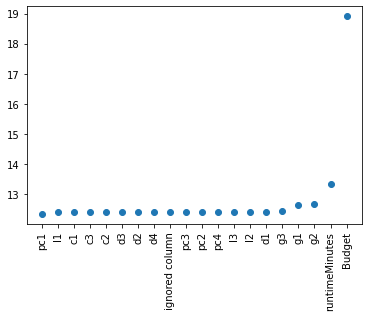

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(df_extract_best_reg.iloc[:,0])
y = np.array(df_extract_best_reg.iloc[:,1])

plt.scatter(x, y)
plt.xticks(rotation = 90)
plt.show()

## Testing 

using the best hyperparameters only <br/>
min_samples_leaf: 4 max_features: 6 n_estimators: 250 max_depth: 18

Selecting features according to ablation study - <br/>
Order 1 - g1, runTimeMinutes, g2, Budget, g3 <br/>
Order 2 - all <br/>

#### significant features only - Order 1

In [62]:
X_train = all_columns_train[["g1", "runtimeMinutes", "g2", "Budget", "g3"]]
y_train = np.log(df_train_data['revenue_worldwide_BOM'])
X_val = all_columns_val[["g1", "runtimeMinutes", "g2", "Budget", "g3"]]
y_val_df = np.log(df_val_data['revenue_worldwide_BOM'])

X_train_val = pd.concat([X_train, X_val]).to_numpy()
y_train_val = pd.concat([y_train, y_val_df]).to_numpy()

X_test = all_columns_test[["g1", "runtimeMinutes", "g2", "Budget", "g3"]].to_numpy()
y_test_df = df_test_data['revenue_worldwide_BOM']

In [65]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4,random_state=0)
regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = abs((y_test_df.at[i] - 2**pred_y_test_df.at[i]))
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
44370461.70480369


#### use all features

In [75]:
X_train = all_columns_train
y_train = np.log(df_train_data['revenue_worldwide_BOM'])
X_val = all_columns_val
y_val_df = np.log(df_val_data['revenue_worldwide_BOM'])

X_train_val = pd.concat([X_train, X_val]).to_numpy()
y_train_val = pd.concat([y_train, y_val_df]).to_numpy()

X_test = all_columns_test.to_numpy()
y_test_df = df_test_data['revenue_worldwide_BOM']

In [78]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4,random_state=0)
regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = abs((y_test_df.at[i] - 2**pred_y_test_df.at[i]))
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
44375246.08310905


## Baseline = 44370461.70480369 MAE

In [79]:
X_train = all_columns_train[["g1", "g2", "Budget", "g3","pc1","pc2","pc3"]]
y_train = np.log(df_train_data['revenue_worldwide_BOM'])
X_val = all_columns_val[["g1", "g2", "Budget", "g3","pc1","pc2","pc3"]]
y_val_df = np.log(df_val_data['revenue_worldwide_BOM'])

X_train_val = pd.concat([X_train, X_val]).to_numpy()
y_train_val = pd.concat([y_train, y_val_df]).to_numpy()

X_test = all_columns_test[["g1", "g2", "Budget", "g3","pc1","pc2","pc3"]].to_numpy()
y_test_df = df_test_data['revenue_worldwide_BOM']

In [80]:
(hp1,hp2,hp3,hp4) = combs[combs_result[0][0]]
regr = RandomForestRegressor(n_estimators = hp3, n_jobs=-1, criterion = 'mse' ,
                         min_samples_leaf = hp1, max_features = hp2,
                         max_depth = hp4,random_state=0)
regr.fit(X_train_val, y_train_val)
pred_y_test = regr.predict(X_test)
pred_y_test_df = pd.DataFrame(pred_y_test)
pred_y_test_df = pred_y_test_df.squeeze()
sum_error = 0
k = 0
for i in range(len(y_test_df)):
    error = abs((y_test_df.at[i] - 2**pred_y_test_df.at[i]))
    sum_error = sum_error + error
    k = k+1
print("min_samples_leaf:",hp1,"max_features:",hp2,"n_estimators:",hp3,"max_depth:",hp4)
print(sum_error/k)

min_samples_leaf: 2 max_features: auto n_estimators: 300 max_depth: 10
44362493.63090095


## Surprise Baseline = 44362493.63090095 MAE